Jonathan Mason
# Calculating Pi and Using Building Models for Data

__Part 1 - Calculating the Value of $\pi$__
<br>
<br>
Pi, written as $\pi$, has tremendous importance in the sciences. Most people know about pi's role as the ratio of a circle's circumference versus its diameter, $\pi = \frac{C}{d}$. As simple as it may seem, pi is an irrational number, thus it cannot be written in the form of a fraction. Pi has a computational role in physics, geometry, trigonometry, calculus, linear algebra, topology, complex dynamics and the list goes on. Hence, the importance of calculating an accurate value of pi. Occasionally, $\frac{22}{7}$ is used to approximate pi; however, it is an inaccurate representation of the actual value of pi and not useful for most computations. The likes of mathematicians and computer scientists have attempted to create methods of approximating the value of pi. A few of these methods include: trapezoidal integration, the Monte-Carlo method, Leibniz's formula, and the Nilakantha series. Each method has a unique way of calculating the value of pi. The effectiveness of these methods varies, as some give up speed for accuracy of digits and vice versa. Calculating the error for each method can be done using the equation,

$$ A = |\frac{\pi_{numerical} - \pi_{actual}}{\pi_{actual}}|. $$

where A is the error.

__Trapezoidal Integration__
<br>
<br>
The trapezoidal rule is a common technique used to find the area under a curve. The method involves partitioning a curve into strips and then making progressively more approximations to the curve in the form of trapezoids in order to find the area. In other words, the trapezoidal rule approximates the definite integral. The definite integral is defined as,

$$\int_{A}^{B}f(x) dx = \lim_{\Delta x \to 0} \sum_{i=1}^{N}f(x_i)\Delta{x}. $$

where $\Delta{x} = \frac{B-A}{N}$, $N =$ number of strips, and $A, B$ are endpoints of the interval. Since this is trapezoidal integration, the method will require the area of a trapezoid given as,

$$ A = h(\frac{a + b}{2}) $$

where $h$ is the height of the trapezoid and $a, b$ are the parallel sides. Consider the area of a trapezoid with the method of integration. To calculate the area under a curve split up the curve into $N$ strips and give each strip a thickness of $\Delta{x}$. The thickness will correspond to height such that $h = \Delta{x}$. Then the endpoints of the interval, $a, b$ are analogous to $f(x_i)$ and $f(x_{i+1})$. Plug that into the formula for the area of a trapezoid and get,

$$ A_i = \Delta{x}\,\frac{f(x_i) + f(x_{i+1})}{2}. $$

Then the integral can be calculated as,

$$ I \approx \sum^{N-1}_{i = 0}{A_i}. $$

Here's a visual of what is going on,

<img src="trapint.png">

(image from: https://en.wikipedia.org/wiki/Trapezoidal_rule)
<br>
<br>
<br>
__Finding Pi with the Trapezoidal Rule__
<br>
<br>
The easiest method of finding a value for pi using the trapezoidal method is using the unit circle. Consider the formula for the area of a circle,

$$ A = \pi{r^2} $$

Since the radius of the unit circle is $r = 1$, then $A = \pi$. Solving for the area of the whole circle using integration is complex. An easier method is to take the integral of the top half of the unit circle such that $y > 0$. This halves the area of the unit circle such that $A = \frac{\pi}{2}$. Thus, multiplying by two after solving for the area using trapezoidal integration will provide the value of pi.

In [200]:
import numpy as np
import matplotlib.pyplot as plt

In [201]:
def findPi(x = .2):
    return np.sqrt(1-x**2)

In [202]:
def trapInt(func, A, B, N, *funcArgs):
    """
    Calculates the definite integral of a function from A to B using the trapezoid rule.
    Keywords:
    func - Function in question
    A - first point of sum
    B - last point of sum
    N - number of strips
    """
    
    I = 0

    # Check that B > A
    if A > B:
        print("Invalid Input...A > B.")
        return 0
        
    # Check that N >= 1
    if N < 1:
        print("Invalid Input...N must be at least 1.")
        return 0
    
    # Create a set of points x_i
    
    x = np.linspace(A, B, N+1) # for N strips need N+1 points
    
    F = func(x)
    h = x[1] - x[0] # x_i+1 - x_i
    
    hF = h*F
    
    I = np.sum(hF) - 0.5*hF[0] - 0.5*hF[-1]
    
    return 2*I

In [203]:
A = trapInt(findPi, -1, 1, 100)
print(A)

3.1382685110985027


In [204]:
A = trapInt(findPi, -1, 1, 10000)
print(A)

3.1415893274302356


In [205]:
def PiError(A):
    """
    Calculates the error from the results of a certain integration algorithm relative to the actual value of pi
    
    Keywords:
    A - approximation of pi
    """
    return abs((A - np.pi)/np.pi)

In [206]:
# See the error
PiError(A)

1.0587494701959077e-06

__The Monte-Carlo Method__
<br>
<br>
The Monte-Carlo methods are a broad class of computation algorithms used to solve problems. Popular for their use in statistics, the Monte-Carlo methods involve generating a bunch of random numbers as points. Thus, it is vital to have a good source of random numbers. Thankfully, python's numpy module can satisfy those requirements. Then, Monte-Carlo can use the randomly generated points to run simulations of a given set of data and come to conclusions. The image below provides a good visual of the Monte-Carlo method.

<img src="Pi_30K.gif">
(Image from: https://en.wikipedia.org/wiki/Monte_Carlo_method)

Each Monte-Carlo method or experiment has a various use whether its for optimization, numerical integration, etc. To generate a value for pi, we will use numerical integration. The numerical integration Monte-Carlo method takes the randomly generated bunch of points and calculates the average. Then, multiply the average by the difference between the endpoints $A$ and $B$ to compute an approximation of pi. The code friendly formula is given as,

$$ I = (B-A)\sum^{N}_{i = 1}\frac{f(x_i)}{N} $$

where $\sum^{N}_{i = 1}\frac{f(x_i)}{N}$ is the mean. Similarly to trapezoidal integration, the Monte-Carlo method only uses half of the unit circle. Thus, multiply by two to obtain a final approximation.

In [207]:
def monteCarloArea(func, A=0, B=3, N=10000):
    """
    Function uses the Monte-Carlo method of numerical integration to find the area under a given curve.
    
    Keywords:
    N - number of random points
    A - first endpoint
    B - second endpoint
    """
     
    if A > B:
        print("Invalid Input...A > B.")
        return 0

    if N < 1:
        print("Invalid Input...N must be at least 1.")
        return 0
    
    # Generate a bunch of random numbers    
    x = np.random.uniform(A, B, round(N)) # round to make sure N is always an integer
    
    # Now calculate the average function value in a loop
    F = func(x)
    
    # Use NumPy mean method for calculating the mean and multiply with B-A
    I = (B-A)*np.mean(F)
    
    return 2*I

In [208]:
B = monteCarloArea(findPi, -1, 1, 100)
print(B)

3.0901947247985735


In [209]:
B = monteCarloArea(findPi, -1, 1, 10000)
print(B)

3.132653257572915


In [210]:
# Same number of iterations...notice result will be different
B = monteCarloArea(findPi, -1, 1, 10000)
print(B)

3.144856184098894


In [211]:
# Error will be different every time
PiError(B)

0.0010388140249091612

__Comparison of the two methods__
<br>
<br>
Trapezoidal integration converges more quickly as it was able to generate a value closer to pi than the Monte-Carlo method with less iterations. Then, as iterations increase, trapezoidal is still more precise in its calculations of actual digits of pi. Additionally, the Monte-Carlo method produces a different result each time because it relies on a randomly generated plot of numbers. In some cases this can be desired, but for computing the value of pi in this context it creates unreliability. One time the function may generate correct digits of pi; however, the next time the function is run it may not produce those same digits. Whereas, the trapezoidal rule is consistent. Thus, trapezoidal integration provides an overall better approximation of pi than the Monte-Carlo method. 
<br>
<br>
<br>
__Circle Inscribed in Square of Side 1__
<br>
<br>
Imagine a square of side one. Then inscribe a quadrant of a circle with radius, $r = 1$. Now if one were to generate a plethora of random points within the square some of the points would lie in the circle, while others would not. Each point has its own $x$ and $y$ coordinate. Using the equation for a circle,

$$ x^2 + y^2 = r $$

one can find the points that lie inside of the circle. Since the circle has $r = 1$,

$$ x^2 + y^2 = 1. $$

Now take any point $(x, y)$ in the square and plug in into the equation for the circle. If $x^2 + y^2 < 1$, then the point lies within the circle. Otherwise, the point is outside of the circle. Then, take the number of points within the circle and divide it by the total number of points in the square. The result will be an approximation of the area of the quadrant of the circle with $r = 1$. In other words, $A = \frac{\pi}{4}$, and multiplying by four should return an estimate for the value of pi. This method is another version of the Monte-Carlo method, sans integration. This method will return a different result every time regardless of if number of points is the same just like the previous Monte-Carlo method.

In [212]:
def mCarloSquare(n = 1000):
    """
    Function finds the value of pi for given number of points by generating a number of random points then
    
    Keywords:
    n - number of points
    """
    # Check
    if n < 1:
        print("Invalid Input...N must be at least 1.")
        return 0
    
    # Create "the square"
    x, y = np.array([np.random.rand(n), np.random.rand(n)])
    
    # Circle
    r = x**2 + y**2
    
    # Will be list of points within the circle
    circle = []
    
    # Create a loop that adds points within circle to list
    for i in r:
        if i < 1:
            circle.append([i])
    
    # Quadrant circle...multiply by 4 to find pi
    A = 4*(len(circle)/n)
    
    return A

In [213]:
mCarloSquare(5000)

3.1464

In [214]:
# More points
mCarloSquare(10000)

3.1376

In [215]:
mCarloSquare(500000)

3.139456

__Leibniz Formula for Pi__
<br>
<br>
Leibniz's formula is an alternative method of computing the value of pi which uses infinite series. Compared to other infinite series methods of finding pi, the Leibniz formula is fairly simple. Consider the inverse-tangent series,

$$ arctan(x) = x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} + \frac{x^9}{9} - ... $$

Plugging $x = 1$ into the inverse-tangent series gives,

$$ 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9} - ... $$

It turns out that the inverse-tangent series when $x = 1$ is equivalent to $\frac{\pi}{4}$. This is proven by Leibniz using integrals and the squeeze theorem. Thus, the Leibniz formula for pi is given as,

$$ 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9} - ... = \frac{\pi}{4} $$

or,

$$ \sum^{\infty}_{n = 0}{\frac{(-1)^n}{2n + 1}} = \frac{\pi}{4}. $$

Since the LHS is equivalent to $\frac{\pi}{4}$, calculating the LHS and multiplying by four should return the value of pi. Although it is not extremely efficient, the Leibniz series is accurate up to five digits of pi. A useful component of the Leibniz series is that it can easily be converted into python code.

In [216]:
def leibniz(iterations = 10000):
    """
    Function perfoms the Leibniz series for any given number of iterations and returns the calculated value of pi.
    
    Keywords:
    A - area of the quadrant circle
    """
    
    A = np.sum((-1)**n / (2*n + 1) for n in range(iterations))
    
    return 4*A

In [217]:
A = leibniz(1000000)
print(A)

3.1415916535897743


In [218]:
# Compare to actual value of pi
PiError(A)

3.183098921653188e-07

__The Nilakantha Series__
<br>
<br>
The Nilakantha series was published by Indian astronomer Nilakantha Somayagi around 1500 AD. It has its similarities to the Leibniz formula for pi; however, the Nilakantha series is a slightly more complex infinite series. This is due to the fact that Nilakantha considered some extra factors of rational approximations which Leibniz did not. The Nilakantha series is given as,

$$ \pi = 3 + \frac{4}{2*3*4} - \frac{4}{4*5*6} + \frac{4}{6*7*8} - \frac{4}{8*9*10} + ... $$

Intuition suggests that the Nilakantha series converges faster than Leibniz formula. This is true, Leibniz formula converges very slowly. The Nilakantha series is not only faster, but it can compute many more digits of pi than Leibniz formula. With the same number of iterations as Leibniz formula, the Nilakantha produces thirteen correct digits of pi, opposed to Leibniz' five. A calculation of error will definitively show that the Nilakantha Series is superior to Leibniz.

In [219]:
def Nilakantha(n = 1000):
    """
    Function performs the Nilakantha series for a given number of iterations.
    
    Keywords:
    n - iterations
    """
    sum = 3 # Using built in sum function will be helpful for loop
    Y = 2 # Starting point in denominator
    
    # Create a loop to compute the infinite series
    for i in range(n):
        if i % 2 == 0: # Checking odd or even term
            sum = sum + (4 / (Y*(Y+1)*(Y+2))) # For positive terms
        else:
            sum = sum - (4 / (Y*(Y+1)*(Y+2))) # For negative terms
        Y = Y + 2 # Continue onto next term
    return sum

In [220]:
B = Nilakantha(1000000)
print(B)

3.141592653589787


In [221]:
# Compare to actual value of pi
PiError(B)

1.9790118017995217e-15

__Part 1 - Conclusion__
<br>
<br>
There is no one correct way to calculate pi. Some methods of calculating pi we analyzed used integration methods, such as, the trapezoidal rule and Monte-Carlo method. On the other hand, Leibniz and Nilakantha used infinite series to calculate pi. Calculating the exact value of pi is not easy. Yet, the desire to calculate pi to greater accuracy remains driven by the theories and models that would not work without pi's existence.

__Part 2 - Estimating Parameters of Simple Harmonic Oscillations__
<br>
<br>
Simple Harmonic Oscillations are very important to the sciences, especially physics. One of their most important characteristics is that a model of harmonic oscillations can be used to approximate physical phenomena. These approximations allow for scientists to make accurate analyzations. For example, consider simple sinusoidal motion. Sinusoidal motions are 2D circular motions projected onto a 1D model. A curve that exhibits sinusoidal motion is smooth and flows nicely.

<img src="sinecurve.png">

(image from: https://ds055uzetaobb.cloudfront.net/image_optimizer/57ff4e6718cfad8c365d724b591dbc7484135f0c.png)
<br>
<br>
Naturally, some phenomena is sinusoidal. The curves for these data is given by the simple harmonic oscillator equation. Consider the exact solution for the simple harmonic oscillator equation,

$$ x = Asin(\omega{t}). $$

where parameter $A$ is the amplitude and parameter $\omega$ is the angular frequency. $A$ will often equal some constant and $\omega = \frac{2\pi}{T}$, where $T$ is the period. For some natural systems, the values of the amplitude and omega are not known and cannot be easily extracted from a plot. Thus, the importance of methods estimating the values of the parameters. Let an estimation equations be defined as, 

$$ x = \beta_0sin(\beta_{1}t) $$

where $\beta_0$ will represent an estimate of the amplitude, while $\beta_1$ will be an estimate of omega. In order to judge the estimates of $\beta_{0}$ and $\beta_{1}$, an error function should be created. An error function for the simple harmonic oscillator is given by,

$$ S = \sum^{N}_{i}{(\beta_{0}sin(\beta_{1}t_{i}) - x_i)^2}, $$

where S is the error between the model and the data.

In [222]:
# Import sineData
data = np.loadtxt("sineData.txt", delimiter = '\t', skiprows = 3)

In [223]:
def myFunction(beta, data):
    """
    Error functions for simple harmonic oscillator. Receives a data set in the form of an array, as well as input values 
    b0 and b1. Returns the error relative the real sho function.
    
    Keywords:
    beta[0] - estimated amplitude
    beta[1] - estimated omega
    """
    # t_i
    tcurrent = data[:,0]
    
    # x_i
    xcurrent = data[:,1]
    
    # (b0sin(b1*t) - x_i)^2
    S = np.sum((beta[0]*np.sin(beta[1]*tcurrent) - xcurrent)**2)
    
    return S

__Particle Swarm Optimization__
<br>
<br>
How does one go about minimizing error between the approximated and the actual harmonic oscillator? Conventional least squares error using derivative will not work for calculating an approximation with the least amount of error. Consider,

$$ \frac{dS}{d\beta_0} = \sum^{N}_{i}{2(\beta_{0}sin(\beta_{1}t_{i}) - x_i)\,sin(\beta_{1}t_{i})} $$

$$ \frac{dS}{d\beta_1} = \sum^{N}_{i}{2(\beta_{0}sin(\beta_{1}t_{i}) - x_i)\,\beta_{0}t_{i}cos(\beta_{1}t_{i})}. $$

Solving for $\frac{dS}{d\beta_{j}} = 0$ is not easy. There must be a better way that does not involve using these derivative. Particle Swarm Optimization(PSO) is a very effective optimization technique inspired by the strategy of flocks of birds when they hunt for food. PSO is given a certain number of points entrusted with the task of locating the best possible solution. Imagine a topographical map. PSO's swarm of points is attempting to reach the lowest possible location on the map. Each individual point searches for the best solution, while simultaneously communicating its results with the other points. Each point records,
- Direction of current location
- Personal best solution
- Overall best solution


This combination serves as a guide for each point. A point will move a fixed amount in the direction of each of the pieces of information it gathers. 

<img src = "PSO.gif">

(image from: https://en.wikipedia.org/wiki/Particle_swarm_optimization)
<br>
<br>
PSO has the ability to find optimum $\beta_0$ and $\beta_1$ by taking in the error function created earlier. After optimum $\beta_0$ and $\beta_1$ are found, a plot comparing the exact data solution and the best fit curve will help analyze the performance of the PSO function.

Text(0,0.5,'$x$')

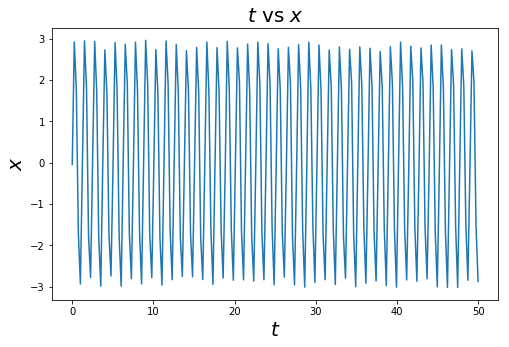

In [224]:
# Plot sineData
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(data[:, 0], data[:, 1])
ax.set_title("$t$ vs $x$", fontsize = 20)
ax.set_xlabel("$t$", fontsize = 20)
ax.set_ylabel("$x$", fontsize = 20)

The curve is smooth, exhibiting signs of being sinusoidal excluding a few points where amplitude seems to be uneven. Analyzing the graph suggests that the amplitude is approximately, $A = 3$. Additionally, the period of the sine curve appears to be $T = 1.25$. Thus, the expected value of omega will be, $\omega = \frac{2\pi}{1.25} \approx{5}.$ Keep these values in mind when analyzing the results of the Particle Swarm Optimization algorithm and what values it returns for $\beta_0$ and $\beta_1$.

In [225]:
t = 1.25
x = 3*np.sin(((2*np.pi)/1.25)*t)
print(x)

-7.347880794884119e-16


In [226]:
# Import the PSO function
from pso import *

In [227]:
# Plug in arguments
best, bestList, traj = pso(myFunction, data, numParticles = 100, iterations = 100, lowerLimit = np.array([0, 0]),
                           upperLimit = np.array([8, 8]))

In [228]:
# Returns [b_0, b_1]
print(best)

[2.99636452 5.0001498 ]


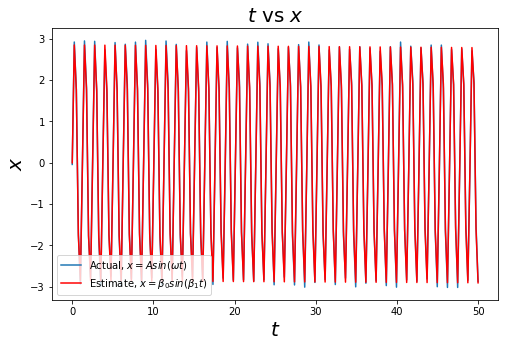

In [229]:
# Plot fit
b0 = best[0]
b1 = best[1]

fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(data[:, 0], data[:, 1], label = "Actual, $x = Asin(\omega{t})$")
ax.plot(data[:, 0], b0*np.sin(b1*data[:, 0]), color = 'r', label = "Estimate, $x = \\beta_{0}sin(\\beta_{1}t)$")
ax.set_title("$t$ vs $x$", fontsize = 20)
ax.set_xlabel("$t$", fontsize = 20)
ax.set_ylabel("$x$", fontsize = 20)
plt.legend()
plt.show()

__Number of Particles vs Number of Iterations__
<br>
<br>
The speed of the Particle Swarm Optimization appears to be quite similar when varying number of particles or number of iterations. As the number of particles or iterations increases, the function tends to become quite slow. This makes sense because it will take substantial time for a large number of particles to converge. Likewise, it will take substantial time to run through a large amount of iterations. Thus, it is best to keep the computational complexity to a minimum as to avoid slow convergence. The number of particles in the swarm and number of iterations have a dependence on one another. With a large number of particles, less iterations will be needed to reach a good solution. Despite that, the PSO function seems to be more sensitive to changes in the number of iterations. If the number of iterations is too low, the function will falsely converge leading to a solution that is not as good. The PSO function returns inconsistent results with an unsuitable amount of iterations.

In [230]:
# Original
best, bestList, traj = pso(myFunction, data, numParticles = 100, iterations = 100, lowerLimit = np.array([0, 0]),
                           upperLimit = np.array([8, 8]))
print(best)

[2.99636018 5.0001499 ]


In [231]:
# Error
myFunction(best, data)

1.083234034804182

In [232]:
# Change number of particles
best, bestList, traj = pso(myFunction, data, numParticles = 10, iterations = 100, lowerLimit = np.array([0, 0]),
                           upperLimit = np.array([8, 8]))
print(best)

[2.99628595 5.00014916]


In [233]:
# Error w/change in particles
myFunction(best, data)

1.0832349841810565

In [234]:
# Change number of iterations
best, bestList, traj = pso(myFunction, data, numParticles = 100, iterations = 10, lowerLimit = np.array([0, 0]),
                           upperLimit = np.array([8, 8]))
print(best)

[2.27285919 4.99467015]


In [235]:
# Error w/change in iterations
myFunction(best, data)

70.3130400105917

__Mars Data__
<br>
<br>
The PSO function was able to handle the sine data easily. Putting PSO to the test against a tougher set of data can show how effective it really is. The next data set will not be so sinusoidal, it will be uneven and pose a challenge to fit. Attempting to plot a fitted curve only with estimated parameters for $A$ and $\omega$ will not work out. To fit a curve that is non-sinusoidal extra variables are needed. The new harmonic oscillator function will be given as,

$$ x = \delta + \beta_0sin(\beta_{1}t + \theta) $$

where $\delta$ is bias and $\theta$ is phase angle. $\beta_0$ and $\beta_1$ will remain estimates for the amplitude and omega, respectively. The PSO function currently only returns 2D arrays. Thus, only two of these variables can be found at a time. We have two choices, to alter the PSO function or to run two separate PSO's.

In [236]:
# Import Mars data
data1 = np.loadtxt("marsx.txt", delimiter = '\t')

Text(0,0.5,'$T$')

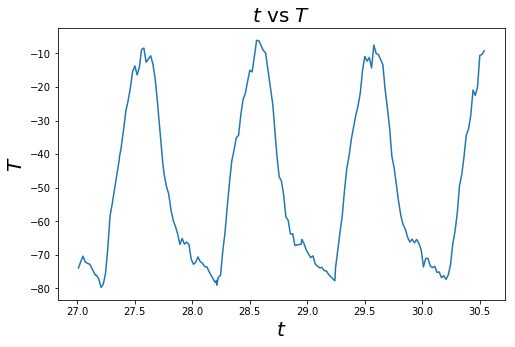

In [237]:
# Plot Mars data
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(data1[:, 0], data1[:, 1])
ax.set_title("$t$ vs $T$", fontsize = 20)
ax.set_xlabel("$t$", fontsize = 20)
ax.set_ylabel("$T$", fontsize = 20)

In [238]:
best, bestList, traj = pso(myFunction, data1, numParticles = 100, iterations = 1000, lowerLimit = np.array([-40, -40]),
                           upperLimit = np.array([-5, -5]))
print(best)

[-36.76675783  -6.20469724]


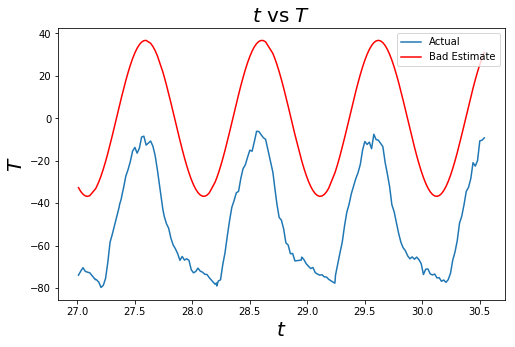

In [239]:
# Notice that the amplitude and omega alone cannot create an accurate plot

b2 = best[0]
b3 = best[1]

fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(data1[:, 0], data1[:, 1], label = "Actual")
ax.plot(data1[:, 0], b2*np.sin(b3*data1[:, 0]), color = 'r', label = "Bad Estimate")
ax.set_title("$t$ vs $T$", fontsize = 20)
ax.set_xlabel("$t$", fontsize = 20)
ax.set_ylabel("$T$", fontsize = 20)
plt.legend()
plt.show()

In [240]:
def myFunction1(beta, data1):
    """
    Adapted error function for non-sinusoidal harmonic oscillators.
    
    Keywords:
    beta[0] - estimated bias
    beta[1] - estimated phase angle 
    """
    # t_i
    tcurrent = data1[:,0]
    
    # x_i
    xcurrent = data1[:,1]
    
    A = -36.76675883
    B = -6.20469724

    S = beta[0] + np.sum((A*np.sin(B*tcurrent + beta[1]) - xcurrent)**2)
    
    return S

In [241]:
best, bestList, traj = pso(myFunction1, data1, numParticles = 100, iterations = 1000, lowerLimit = np.array([-45, -45]),
                           upperLimit = np.array([np.pi, np.pi]))
print(best)

[-44.99652742 -12.56395672]


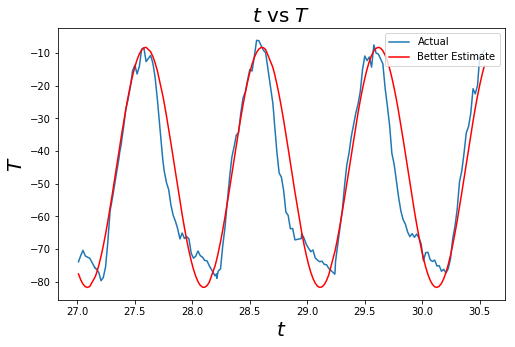

In [242]:
# Plot fit
b2 = best[0]
b3 = best[1]
A = -36.76675883
B = -6.20469724

fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(data1[:, 0], data1[:, 1], label = "Actual")
ax.plot(data1[:, 0], b2 + A*np.sin(B*data1[:, 0]+ b3), color = 'r', label = "Better Estimate")
ax.set_title("$t$ vs $T$", fontsize = 20)
ax.set_xlabel("$t$", fontsize = 20)
ax.set_ylabel("$T$", fontsize = 20)
plt.legend()
plt.show()

__Part 2 - Conclusion__
<br>
<br>
Particle Swarm Optimization is effective at accomplishing its goal. Although it is much easier for PSO to work with sinusoidal curves, it has to ability to deal with more rugged, inconsistent curves as well. Much of PSO's effectiveness lies in the user's ability to set a quality range for the particles to search. A normal computer cannot handle extremely large numbers of particles and iterations that would be needed to locate the optimum point in a poor range. PSO's importance amplifies the significance of the simple harmonic oscillator equation. It is astounding how far technology and mathematics have come that there are methods that can approximate the performance of even the most difficult sets of data.

Sources:
<br>
https://en.wikipedia.org/wiki/Harmonic_oscillator
<br>
https://en.wikipedia.org/wiki/Leibniz_formula_for_%CF%80
<br>
https://en.wikipedia.org/wiki/Monte_Carlo_method
<br>
https://en.wikipedia.org/wiki/Particle_swarm_optimization
<br>
https://en.wikipedia.org/wiki/Pi
<br>
https://en.wikipedia.org/wiki/Trapezoidal_rule